# Welcome to the API PT2!

## Data Edition

#### Goal - Filter down to the pit density we want and plot it

### Step 1. Imports

In [31]:
# imports
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
from snowexsql.api import PointMeasurements, LayerMeasurements

print(LayerMeasurements().all_site_names)

[('Cameron Pass',), ('Sagehen Creek',), ('Fraser Experimental Forest',), ('Mammoth Lakes',), ('Niwot Ridge',), ('Boise River Basin',), ('Little Cottonwood Canyon',), ('East River',), ('American River Basin',), ('Senator Beck',), ('Jemez River',), ('Grand Mesa',)]


### Step 2. Find the pits in Grand Mesa

In [24]:
df = LayerMeasurements.from_filter(
    type="density",
    site_name="Boise River Basin",
    limit=1000
)
# TODO: filter by dates >apr 1 that would reasonably be the timeseries pits
df.loc[:, ["site_id", "geom"]].drop_duplicates().explore()

### Step 3. Pick a point of interest

In [41]:
# Filter down to ONE timeseries
df = LayerMeasurements.from_filter(
    type="density",
    site_id="Banner Open"
).set_crs("epsg:26911")

df.loc[:, ["site_id", "geom"]].drop_duplicates().explore()


In [36]:
# Get the mean of each date sampled
df["value"] = df["value"].astype(float)
df.set_index("date", inplace=True)
mean_values = df.groupby(df.index).mean()
mean_values

,id,latitude,longitude,northing,easting,utm_zone,depth,bottom_depth,value
date,,,,,,,,,
2019-12-18,22609.5,44.30464,-115.23603,4.907222e+06,640699.666121,11.0,26.000000,16.000000,279.000000
2020-01-09,22670.0,44.30463,-115.23601,4.907221e+06,640701.285289,11.0,51.000000,41.000000,156.777778
2020-01-23,22746.0,44.30461,-115.23598,4.907219e+06,640703.725988,11.0,61.727273,51.727273,254.166667
2020-01-30,22830.5,44.30461,-115.23598,4.907219e+06,640703.725988,11.0,72.000000,62.000000,236.000000
2020-02-06,22910.0,44.30458,-115.23594,4.907216e+06,640706.988222,11.0,72.000000,62.000000,254.141026
2020-02-13,23020.5,44.30447,-115.23606,4.907204e+06,640697.679385,11.0,68.000000,58.230769,276.166667
2020-02-19,23108.5,44.30462,-115.23603,4.907220e+06,640699.713907,11.0,72.000000,62.000000,274.763889
2020-02-27,23189.5,44.30454,-115.23603,4.907211e+06,640699.905052,11.0,69.000000,59.000000,295.045455
2020-03-05,23269.0,44.30448,-115.23599,4.907205e+06,640703.238968,11.0,65.000000,55.000000,319.939394


### Notes on this mean

Taking this `mean` as bulk density **could be flawed** if layers are overlapping or layers vary in thickness

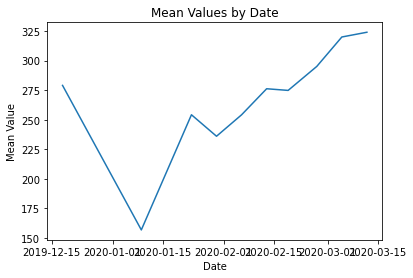

In [38]:
# Plot the timeseries of densities

mean_values["value"].plot()
plt.title('Mean Values by Date')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()

/Users/micahsandusky/projects/m3works/snowexsql/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


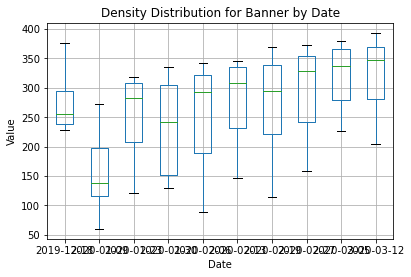

In [40]:
# Show more detail by using a box plot
df.boxplot(by='date', column='value')
plt.title('Density Distribution for Banner by Date')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()